<a href="https://colab.research.google.com/github/christophergarcia89/bci/blob/main/Hipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importar libreria para leer dataset desde drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Leer data
data = pd.read_csv("/content/drive/MyDrive/BCI/worldcitiespop.txt", encoding= 'unicode_escape')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
#Contenido dataset
data.head(5)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333


In [14]:
data.tail(5)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173953,zw,zimre park,Zimre Park,4,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,0,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,4,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,6,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,7,79876.0,-20.333333,30.033333


In [15]:
#Tipo de variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173958 entries, 0 to 3173957
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Country     object 
 1   City        object 
 2   AccentCity  object 
 3   Region      object 
 4   Population  float64
 5   Latitude    float64
 6   Longitude   float64
dtypes: float64(3), object(4)
memory usage: 169.5+ MB


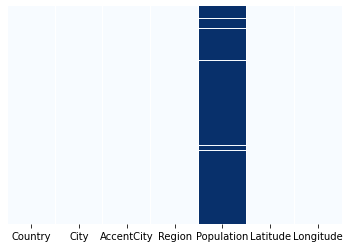

In [7]:
# Ver datos faltantes, variable population con una gran cantidad de NAN
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [8]:
data.isna().sum()

Country             0
City                6
AccentCity          0
Region              8
Population    3125978
Latitude            0
Longitude           0
dtype: int64

In [9]:
#Validar data faltante de Population
data[data['Population'].isnull()]

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333
...,...,...,...,...,...,...,...
3173952,zw,zimbabwe,Zimbabwe,7,NaN,-20.266667,30.916667
3173953,zw,zimre park,Zimre Park,4,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,0,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,4,NaN,-17.758889,31.010556


In [10]:
##Validar data faltante de Ciudad
data[data['City'].isnull()]

,Country,City,AccentCity,Region,Population,Latitude,Longitude
98581,al,NaN,Nan,47,NaN,42.011667,20.416389
545196,cn,NaN,Nan,11,NaN,29.359551,112.402433
959881,fr,NaN,Nan,A1,NaN,47.374053,4.358566
1348414,in,NaN,Nan,12,NaN,32.994444,74.347222
2133528,ph,NaN,Nan,H2,NaN,13.912500,122.172600
2753400,th,NaN,Nan,4,24670.0,18.792917,100.729722


In [16]:
#Validar data faltante de Region
data[data['Region'].isnull()]

,Country,City,AccentCity,Region,Population,Latitude,Longitude
55166,af,nazand,Nazand,NaN,NaN,32.400278,69.254722
79529,af,soripai narai,Soripai Narai,NaN,NaN,33.044444,69.516667
1318396,il,bayt safafa,Bayt Safafa,NaN,NaN,31.742667,35.203036
1318491,il,beit safafa,Beit Safafa,NaN,NaN,31.742667,35.203036
2220223,pk,nazand,Nazand,NaN,NaN,32.400278,69.254722
2235464,pk,soripai narai,Soripai Narai,NaN,NaN,33.044444,69.516667
2588960,sd,kajra,Kajra,NaN,NaN,17.251944,34.488056
2651070,sn,taba treich,Taba Treich,NaN,NaN,16.158611,-16.382500


In [17]:
#Genero otro dataset para conservar Population
data2 = data.dropna()

In [18]:
#Al haber gran cantidad de NAN para la columna Population (Superior al 98%) no tiene sentido analizar. Con respecto a la columna AccentCity, es un simil a City por lo tanto igual se elimina
#Las filas NAN de Region (8), City (6) se eliminan igualmente
#Elimando columna Population y AccentCity
data.drop(["Population","AccentCity"], axis = 1, inplace = True)

In [19]:
#Elimando filas Region y City con NAN, ya que no alterarian el análisis final
data.drop(data[data.Region.isnull()].index, inplace = True)
data.drop(data[data.City.isnull()].index, inplace = True)

In [20]:
data.isna().sum()

Country      0
City         0
Region       0
Latitude     0
Longitude    0
dtype: int64

In [21]:
#Top 20 de cantidad de registros por pais
data.value_counts(data['Country']).sort_values(ascending=False).head(20)

Country
cn    238984
ru    215938
id    176546
us    141989
ir    123872
pk     94245
af     88747
tr     72451
de     70477
fr     66361
mx     62116
th     56845
pl     49666
ph     48232
kr     44601
ng     43763
br     43204
ua     42775
in     39812
mm     33856
dtype: int64

In [22]:
#Top 20 de cantidad de registros por ciudad
data.value_counts(data['City']).sort_values(ascending=False).head(20)

City
san jose         328
san antonio      320
santa rosa       296
santa cruz       282
san juan         255
san miguel       254
santa maria      253
san pedro        248
san francisco    235
san isidro       234
buena vista      234
santa ana        210
san rafael       207
santa rita       195
santa lucia      194
buenavista       190
san vicente      186
san luis         181
santa barbara    176
la esperanza     168
dtype: int64

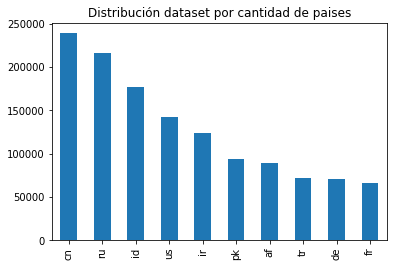

In [23]:
#Distribución del dataset por paises. Top 10
plot = data['Country'].value_counts().head(10).plot(kind='bar',
                                            title='Distribución dataset por cantidad de paises')

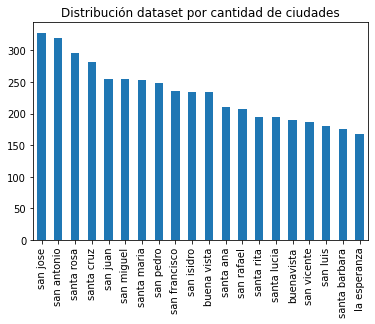

In [24]:
#Distribución del dataset por ciudades. Top 20
plot = data['City'].value_counts().head(20).plot(kind='bar',
                                            title='Distribución dataset por cantidad de ciudades')

In [ ]:
#Filtro top 5 de paises con mayor registro y luego genero un dataset con el top 5 de paises para geolocalizar
dataset_cn = data[data['Country'] == 'cn']

In [ ]:
dataset_ru = data[data['Country'] == 'ru']

In [ ]:
dataset_id = data[data['Country'] == 'id']

In [25]:
dataset_us = data[data['Country'] == 'us']

In [ ]:
dataset_ir = data[data['Country'] == 'ir']

In [ ]:
dataset_cn.to_csv (r'/content/drive/MyDrive/BCI/dataset_cn.csv', index=None)

In [ ]:
dataset_ru.to_csv (r'/content/drive/MyDrive/BCI/dataset_ru.csv', index=None)

In [ ]:
dataset_id.to_csv (r'/content/drive/MyDrive/BCI/dataset_id.csv', index=None)

In [ ]:
dataset_us.to_csv (r'/content/drive/MyDrive/BCI/dataset_us.csv', index=None)

In [ ]:
dataset_ir.to_csv (r'/content/drive/MyDrive/BCI/dataset_ir.csv', index=None)

In [ ]:
data2

,Country,City,AccentCity,Region,Population,Latitude,Longitude
6,ad,andorra la vella,Andorra la Vella,7,20430.0,42.500000,1.516667
20,ad,canillo,Canillo,2,3292.0,42.566667,1.600000
32,ad,encamp,Encamp,3,11224.0,42.533333,1.583333
49,ad,la massana,La Massana,4,7211.0,42.550000,1.516667
53,ad,les escaldes,Les Escaldes,8,15854.0,42.500000,1.533333
...,...,...,...,...,...,...,...
3173646,zw,redcliffe,Redcliffe,6,38231.0,-19.033333,29.783333
3173676,zw,rusape,Rusape,4,23761.0,-18.533333,32.116667
3173737,zw,shurugwi,Shurugwi,7,17107.0,-19.666667,30.000000
3173892,zw,victoria falls,Victoria Falls,0,36702.0,-17.933333,25.833333


In [ ]:
#Guardo dataset con registros de Population sin valores nulos como referencia
data2.to_csv (r'/content/drive/MyDrive/BCI/datasetPopulation.csv', index=None)

In [ ]:
#Se suber los archivos generados en servicio de mymaps de Google para referenciar puntos en mapa. Se distribuyen en distintos archivos por el peso de los archivos, lo cuál el servicio
#de google no soporta un peso mayor a 10mb.

In [26]:
dataset_us

,Country,City,Region,Latitude,Longitude
2907718,us,abanda,AL,33.100833,-85.529722
2907719,us,abbeville,AL,31.571667,-85.250556
2907720,us,abbot springs,AL,33.360833,-86.481667
2907721,us,abel,AL,33.548611,-85.712500
2907722,us,abercrombie,AL,32.848611,-87.165000
...,...,...,...,...,...
3049702,us,wyoming,WY,41.477500,-105.636111
3049703,us,wyopo,WY,42.855556,-108.688611
3049704,us,y-o ranch,WY,42.030833,-104.939444
3049705,us,yanceys,WY,44.930833,-110.435556


In [34]:
#Top 20 de cantidad de registros por pais
dataset_us.value_counts(dataset_us['City']).sort_values(ascending=False).head(30)

City
riverside          46
centerville        43
fairview           40
midway             39
franklin           39
greenwood          37
union              37
glendale           36
marion             36
salem              36
lincoln            35
georgetown         35
oakland            35
pleasant valley    35
liberty            35
fairfield          35
clinton            34
florence           34
arlington          34
greenville         34
springfield        34
bethel             34
chester            33
kingston           33
clifton            33
newport            33
milton             33
farmington         33
hamilton           33
eden               32
dtype: int64

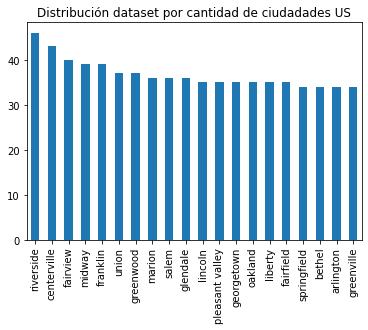

In [31]:
#Distribución del dataset por paises. Top 10
plot = dataset_us['City'].value_counts().head(20).plot(kind='bar',
                                            title='Distribución dataset por cantidad de ciudadades US')

In [35]:
dataset_gb = data[data['Country'] == 'gb']

In [36]:
dataset_gb.to_csv (r'/content/drive/MyDrive/BCI/dataset_gb.csv', index=None)

In [37]:
dataset_gb

,Country,City,Region,Latitude,Longitude
986483,gb,abberley,Q4,52.300000,-2.366667
986484,gb,abberton,E4,51.833333,0.916667
986485,gb,abberton,Q4,52.183333,-2.016667
986486,gb,abbess roding,E4,51.783333,0.266667
986487,gb,abbey-cwmhir,Y8,52.333333,-3.400000
...,...,...,...,...,...
1004186,gb,zeals,P8,51.083611,-2.314167
1004187,gb,zeal,P8,51.083611,-2.314167
1004188,gb,zelah,C6,50.316667,-5.066667
1004189,gb,zennor,C6,50.183333,-5.566667
